# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [16]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "./Resources/city_data.csv"
ride_data_to_load = "./Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [17]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [18]:
#  1. Get the total rides for each city type
total_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [19]:
# 2. Get the total drivers for each city type
total_drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]

In [20]:
#  3. Get the total amount of fares for each city type
total_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]

In [21]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride_by_city_type = total_fares_by_city_type / total_rides_by_city_type

In [22]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver_by_city_type = total_fares_by_city_type / total_drivers_by_city_type

In [23]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides": total_rides_by_city_type, 
                                 "Total Drivers": total_drivers_by_city_type,
                                 "Total Fares": total_fares_by_city_type,
                                 "Average Fare per Ride": avg_fare_per_ride_by_city_type ,
                                 "Average Fare per Driver": avg_fare_per_driver_by_city_type
                                })
pyber_summary_df         

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [24]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [25]:
#  8. Format the columns.
# modified using formatting princables found in: 
# https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.format.html

# The formatted dataframe is copied from the "pyber_summary_df" to maintane the two DF's. This allows additional 
# modifications inside the "pyber_summary_df.style.format" section to be tested and tried without changing the DF. 
formatted_pyber_summary_df = pyber_summary_df.style.format({"Total Rides": "{:,}",
                                    "Total Drivers": "{:,}",
                                    "Total Fares": "${:,.2f}", 
                                    "Average Fare per Ride":"${:,.2f}",
                                    "Average Fare per Driver":"${:,.2f}"})
formatted_pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [26]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [27]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fares_by_city_type_and_date = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]

In [28]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fares_by_city_type_and_date = total_fares_by_city_type_and_date.reset_index()

In [29]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fares_pivot_df = total_fares_by_city_type_and_date.pivot(index="date", columns="type", values="fare")

In [30]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
specific_dataset_total_fares_df = total_fares_pivot_df.loc["2019-01-01":"2019-04-29"]

In [31]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
specific_dataset_total_fares_df.index = pd.to_datetime(specific_dataset_total_fares_df.index)

In [32]:
# 7. Check that the datatype for the index is datetime using df.info()
specific_dataset_total_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [33]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_summary_total_fares_by_city_type = specific_dataset_total_fares_df.resample("W").sum()

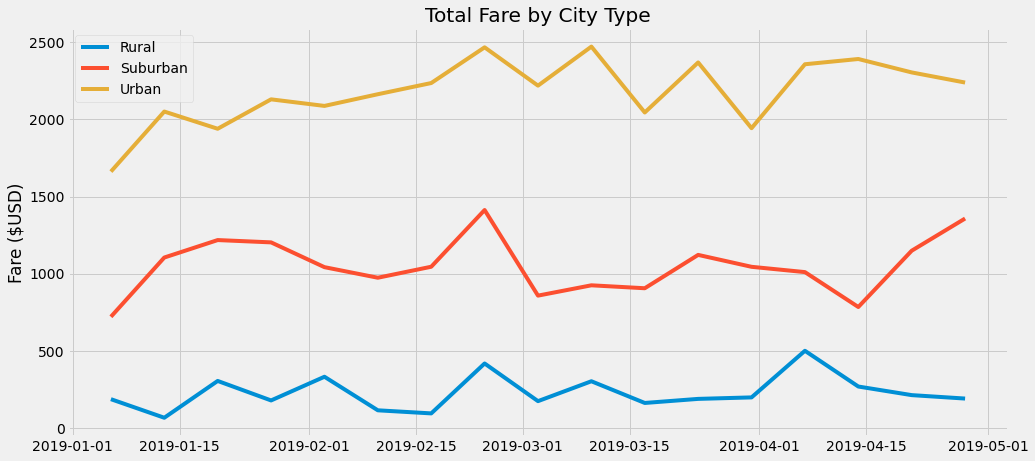

In [34]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Create the start of the plot using the object-oriented interface method
fig, ax = plt.subplots(figsize=(15,7))
# Add in the data to plot for the line chart
ax.plot(weekly_summary_total_fares_by_city_type)
# Set the title of the chart
ax.set_title("Total Fare by City Type")
# Set the yLabel for the chart
ax.set_ylabel("Fare ($USD)")
# Add the legend 
ax.legend(weekly_summary_total_fares_by_city_type)
# Save a copy of the chart into a folder and title the file
plt.savefig("./Analysis/PyBer_fare_summary.png")